# Trabajo Práctico 7 - Morfología

Integrantes:

* Ian Cruz Diaz
* Martín Sebastián Rodriguez Turco
* Agustín Galdeman

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Dilación

Se propone aplicar la operación de dilación a la imagen siendo el elemento estructural:

$$B = [0 1 0 ; 1 1 1 ; 0 1 0]$$

In [18]:
text_img = cv2.imread('/content/drive/Shareddrives/Imagenes/TP7/imgs/Broken_Text.tif', cv2.IMREAD_GRAYSCALE)

Sabemos que en Open CV2, el elemento estructural B definido arriva se puede encontrar como 

```
cv2.MORPH_CROSS
```



In [19]:
kernel_cross_3 =  cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
kernel_cross_3

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]], dtype=uint8)

Ahora aplicamos la operación de dilación

In [21]:
text_img_dilation = cv2.dilate(text_img, kernel_cross_3, iterations=2)

Consecuentemente ploteamos las imagenes

In [22]:
def plot_images(original, txt1, other, txt2):
    fig=plt.figure(figsize=(14, 10))
    fig.add_subplot(1, 2, 1)
    plt.title(txt1)
    plt.imshow(original, cmap='gray')
    fig.add_subplot(1, 2, 2)
    plt.title(txt2)
    plt.imshow(other, cmap='gray')

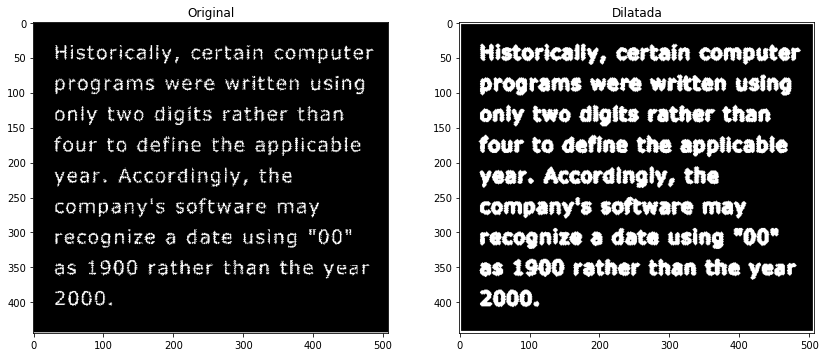

In [23]:
plot_images(text_img, 'Original', text_img_dilation, 'Dilatada')

## Erosión

In [50]:
noisy_squares = cv2.imread('/content/drive/Shareddrives/Imagenes/TP7/imgs/Noisy_Squares.tif',cv2.IMREAD_GRAYSCALE)
kernel_9 =  cv2.getStructuringElement(cv2.MORPH_CROSS,(9,9)) #np.array([[1,1,1],[1,1,1],[1,1,1]]) #np.ones((5,5),np.uint8)

kernel = np.ones((13,13),np.uint8)

erosion = cv2.erode(noisy_squares,kernel,iterations = 1)

dilated = cv2.dilate(erosion, kernel, iterations= 1)


In [51]:
def plot_images_3(img1, txt1, img2, txt2, img3, txt3):
    fig=plt.figure(figsize=(14, 10))
    fig.add_subplot(1, 3, 1)
    plt.title(txt1)
    plt.imshow(img1, cmap='gray')
    fig.add_subplot(1, 3, 2)
    plt.title(txt2)
    plt.imshow(img2, cmap='gray')
    fig.add_subplot(1, 3, 3)
    plt.title(txt3)
    plt.imshow(img3, cmap='gray')

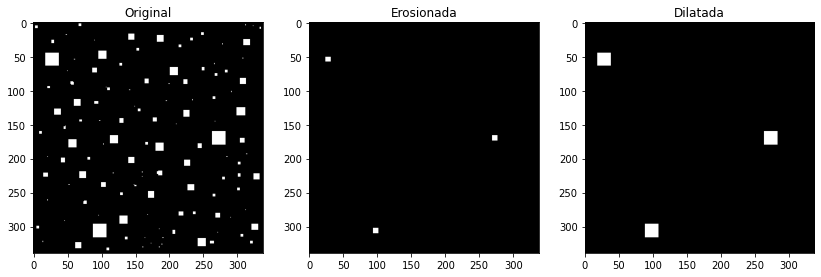

In [52]:
plot_images_3(noisy_squares,"Original",erosion,"Erosionada", dilated, "Dilatada" )

## Apertura

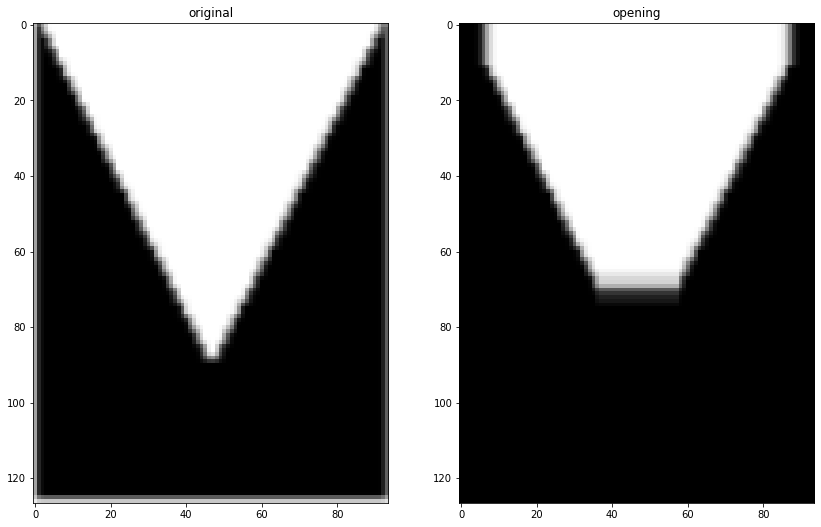

In [77]:
img = cv2.imread('/content/drive/Shareddrives/Imagenes/TP7/imgs/apertura.png',cv2.IMREAD_GRAYSCALE)

aperture = 21#@param {type:"slider", min:1, max:65, step:1}
kernel = np.ones((aperture,aperture),np.uint8)
aperture_img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

plot_images(img,"original",aperture_img,"opening")

## Contorno

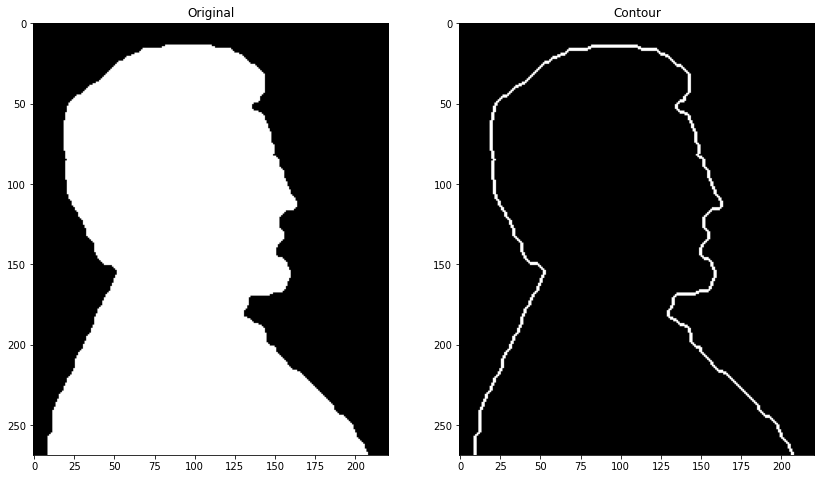

In [81]:
img = cv2.imread('/content/drive/Shareddrives/Imagenes/TP7/imgs/Lincoln from penny.tif',cv2.IMREAD_GRAYSCALE)

img_erosion = cv2.erode(img, kernel_cross_3, iterations=2)
plot_images(img, 'Original', img - img_erosion, 'Contour')



## Investigación

### Thinning

El Thinning es una operación morfológica que se utiliza para eliminar los píxeles de primer plano seleccionados de las imágenes binarias, parecido a la erosión o la apertura. Puede utilizarse para varias aplicaciones, pero es especialmente útil para la esqueletización. En este modo se suele utilizar para ordenar la salida de los detectores de bordes reduciendo todas las líneas a un solo píxel de grosor. El Thinning se aplica normalmente sólo a las imágenes binarias, y produce otra imagen binaria como salida.

A continuación se puede observar un ejemplo de thinning

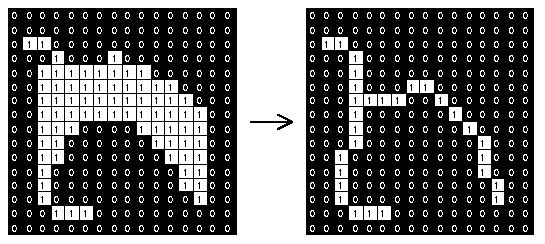

### Thickening

El Thickening es una operación morfológica que se utiliza para hacer crecer las regiones seleccionadas de los píxeles de primer plano en las imágenes binarias, algo así como la dilatación. Tiene varias aplicaciones, como la determinación del casco convexo aproximado de una forma y la determinación del esqueleto por zona de influencia. El Thickening se aplica normalmente sólo a las imágenes binarias, y produce otra imagen binaria como salida. 

A continuación tenemos un ejemplo de thickening

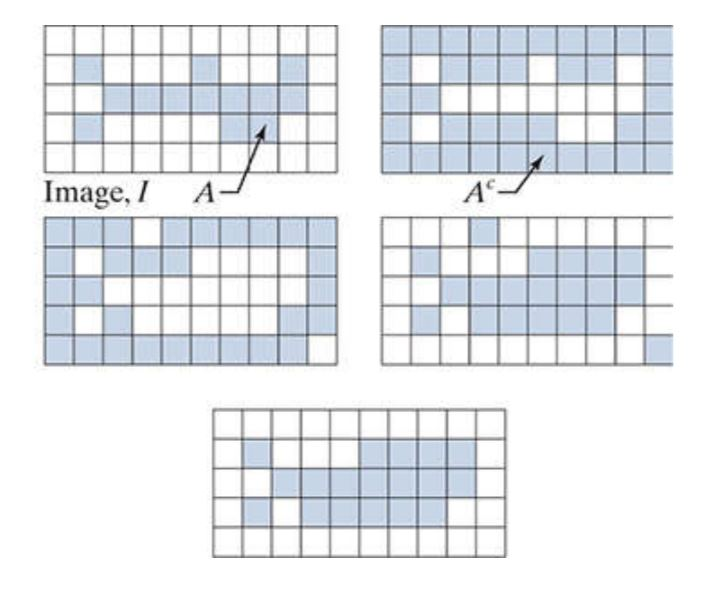


### Top-Hat Transform

La Top-Hat Transform es una operación que extrae pequeños elementos y detalles de las imágenes dadas. Existen dos tipos de Top-Hat Transform: la White Top-Hat Transform se define como la diferencia entre la imagen de entrada y su apertura por algún elemento estructurante, mientras que la Balck Top-Hat Transform se define dualmente como la diferencia entre el cierre y la imagen de entrada. Las Top-Hat Transforms se utilizan para diversas tareas de procesamiento de imágenes, como la extracción de características, la ecualización de fondos y la mejora de imágenes, entre otras. 

A continuacion podemos ver un ejemplo de esta transformada

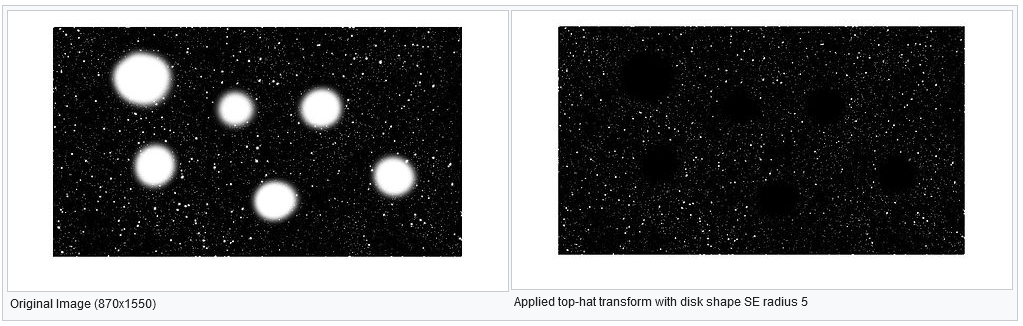

### Hit and Miss

La transformación de Hit and Miss es una operación morfológica binaria general que puede utilizarse para buscar patrones particulares de píxeles de primer plano y de fondo en una imagen. En realidad, es la operación básica de la morfología binaria, ya que casi todos los demás operadores morfológicos binarios pueden derivarse de ella. Al igual que otros operadores morfológicos binarios, toma como entrada una imagen binaria y un elemento estructurante, y produce otra imagen binaria como salida. 

A continuacion podemos ver un ejemplo de esta transformación

Partiendo de que se quiere encontrar las esquinas de una imagen, se plantean los siguientes kernels

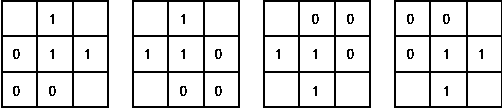


y luego se aplica la transformacion sobre la imagen:

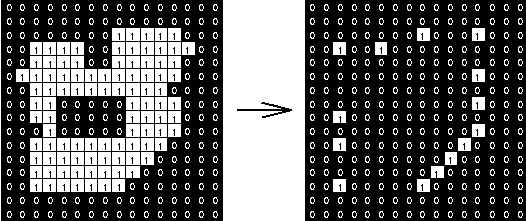